## IBM Keras - Final Assignment - Part B

In [49]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The data looks clean, with no null values. We have to predict data of concrete strength



In [9]:
X = df[df.columns[df.columns != 'Strength']]

In [10]:
y = df['Strength']

### Import Keras Models

In [11]:
from keras.models import Sequential
from keras.layers import Dense

### Part A - Build Baseline Model

In [12]:
#Create Neural Network

def regression_model():
    #create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    #compile the model
    model.compile(optimizer='adam', loss ='mean_squared_error')
    return(model)

### Split the data

Since the data is clean we can go ahead and split the data in train and test dataset.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
n_cols = X_train.shape[1]
n_cols

8

In [19]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (721, 8)
y_train: (721,)
X_test: (309, 8)
y_test: (309,)


### Part B - Normalize the Predictors

In [29]:
X_train_norm = (X_train - X_train.mean()) / X_train.std()
#X_train_norm
X_test_norm = (X_test - X_test.mean()) / X_test.std()

In [30]:
#build the model
model = regression_model()

In [44]:
#fit the model

model.fit(X_train_norm, y_train, validation_split=0.2, epochs=50)

Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 180us/step - loss: 26.6861 - val_loss: 46.6288
Epoch 2/50
576/576 [==============================] - 0s 95us/step - loss: 26.6773 - val_loss: 46.6566
Epoch 3/50
576/576 [==============================] - 0s 83us/step - loss: 26.6817 - val_loss: 46.6222
Epoch 4/50
576/576 [==============================] - 0s 120us/step - loss: 26.6769 - val_loss: 46.6803
Epoch 5/50
576/576 [==============================] - 0s 96us/step - loss: 26.6789 - val_loss: 46.7247
Epoch 6/50
576/576 [==============================] - 0s 96us/step - loss: 26.7500 - val_loss: 46.6052
Epoch 7/50
576/576 [==============================] - 0s 96us/step - loss: 26.7138 - val_loss: 46.6491
Epoch 8/50
576/576 [==============================] - 0s 114us/step - loss: 26.6931 - val_loss: 46.6931
Epoch 9/50
576/576 [==============================] - 0s 114us/step - loss: 26.7008 - val_loss: 46.6588
Epoch 10/50
576/576 [==

In [45]:
#Prediction on test data

predict_yhat = model.predict(X_test_norm)

In [46]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predict_yhat)
mse

46.05576747496959

In [47]:
mse_total = []

for i in range(50):
    
    print('\nIteration: ', i+1)
    model.fit(X_train_norm, y_train, validation_split=0.2, epochs=50)
    predict_yhat = model.predict(X_test_norm)
    mse = mean_squared_error(y_test, predict_yhat)
    print('\n''Mean Squared Error for iteration{}: {}'.format(i+1, mse))
    mse_total.append(mse)


Iteration: 1
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 123us/step - loss: 26.7527 - val_loss: 46.7686
Epoch 2/50
576/576 [==============================] - 0s 86us/step - loss: 26.6802 - val_loss: 46.7348
Epoch 3/50
576/576 [==============================] - 0s 79us/step - loss: 26.7129 - val_loss: 46.6938
Epoch 4/50
576/576 [==============================] - 0s 81us/step - loss: 26.7368 - val_loss: 46.6369
Epoch 5/50
576/576 [==============================] - 0s 81us/step - loss: 26.7126 - val_loss: 46.6950
Epoch 6/50
576/576 [==============================] - 0s 78us/step - loss: 26.7017 - val_loss: 46.5179
Epoch 7/50
576/576 [==============================] - 0s 87us/step - loss: 26.7165 - val_loss: 46.6301
Epoch 8/50
576/576 [==============================] - 0s 88us/step - loss: 26.7187 - val_loss: 46.7084
Epoch 9/50
576/576 [==============================] - 0s 88us/step - loss: 26.7021 - val_loss: 46.6520
Epoch 10/50


576/576 [==============================] - 0s 79us/step - loss: 26.6952 - val_loss: 46.7354
Epoch 29/50
576/576 [==============================] - 0s 85us/step - loss: 26.6865 - val_loss: 46.6332
Epoch 30/50
576/576 [==============================] - 0s 79us/step - loss: 26.6835 - val_loss: 46.7162
Epoch 31/50
576/576 [==============================] - 0s 73us/step - loss: 26.6970 - val_loss: 46.6441
Epoch 32/50
576/576 [==============================] - 0s 75us/step - loss: 26.6837 - val_loss: 46.8372
Epoch 33/50
576/576 [==============================] - 0s 75us/step - loss: 26.7066 - val_loss: 46.6457
Epoch 34/50
576/576 [==============================] - 0s 71us/step - loss: 26.6648 - val_loss: 46.6762
Epoch 35/50
576/576 [==============================] - 0s 75us/step - loss: 26.6728 - val_loss: 46.6529
Epoch 36/50
576/576 [==============================] - 0s 71us/step - loss: 26.6972 - val_loss: 46.6812
Epoch 37/50
576/576 [==============================] - 0s 70us/step - loss: 

576/576 [==============================] - 0s 72us/step - loss: 26.6961 - val_loss: 46.7163
Epoch 5/50
576/576 [==============================] - 0s 73us/step - loss: 26.6841 - val_loss: 46.6261
Epoch 6/50
576/576 [==============================] - 0s 75us/step - loss: 26.6954 - val_loss: 46.7296
Epoch 7/50
576/576 [==============================] - 0s 73us/step - loss: 26.6907 - val_loss: 46.6936
Epoch 8/50
576/576 [==============================] - 0s 71us/step - loss: 26.7430 - val_loss: 46.7047
Epoch 9/50
576/576 [==============================] - 0s 71us/step - loss: 26.6912 - val_loss: 46.7660
Epoch 10/50
576/576 [==============================] - 0s 71us/step - loss: 26.6927 - val_loss: 46.6381
Epoch 11/50
576/576 [==============================] - 0s 72us/step - loss: 26.6767 - val_loss: 46.6083
Epoch 12/50
576/576 [==============================] - 0s 72us/step - loss: 26.6795 - val_loss: 46.6316
Epoch 13/50
576/576 [==============================] - 0s 72us/step - loss: 26.71

Epoch 32/50
576/576 [==============================] - 0s 72us/step - loss: 26.7300 - val_loss: 46.7709
Epoch 33/50
576/576 [==============================] - 0s 71us/step - loss: 26.6951 - val_loss: 46.7786
Epoch 34/50
576/576 [==============================] - 0s 71us/step - loss: 26.7076 - val_loss: 46.5946
Epoch 35/50
576/576 [==============================] - 0s 80us/step - loss: 26.7774 - val_loss: 46.8076
Epoch 36/50
576/576 [==============================] - 0s 76us/step - loss: 26.6866 - val_loss: 46.6787
Epoch 37/50
576/576 [==============================] - 0s 75us/step - loss: 26.6581 - val_loss: 46.7257
Epoch 38/50
576/576 [==============================] - 0s 73us/step - loss: 26.6857 - val_loss: 46.8146
Epoch 39/50
576/576 [==============================] - 0s 84us/step - loss: 26.6672 - val_loss: 46.6730
Epoch 40/50
576/576 [==============================] - 0s 76us/step - loss: 26.7257 - val_loss: 46.6698
Epoch 41/50
576/576 [==============================] - 0s 72us/s

576/576 [==============================] - 0s 81us/step - loss: 26.6882 - val_loss: 46.8178
Epoch 9/50
576/576 [==============================] - 0s 78us/step - loss: 26.6378 - val_loss: 46.7267
Epoch 10/50
576/576 [==============================] - 0s 71us/step - loss: 26.6664 - val_loss: 46.7766
Epoch 11/50
576/576 [==============================] - 0s 71us/step - loss: 26.6541 - val_loss: 46.7138
Epoch 12/50
576/576 [==============================] - 0s 87us/step - loss: 26.7249 - val_loss: 46.7272
Epoch 13/50
576/576 [==============================] - 0s 71us/step - loss: 26.6560 - val_loss: 46.7254
Epoch 14/50
576/576 [==============================] - 0s 71us/step - loss: 26.6763 - val_loss: 46.7701
Epoch 15/50
576/576 [==============================] - 0s 71us/step - loss: 26.7177 - val_loss: 46.7165
Epoch 16/50
576/576 [==============================] - 0s 70us/step - loss: 26.6778 - val_loss: 46.8077
Epoch 17/50
576/576 [==============================] - 0s 71us/step - loss: 2

Epoch 36/50
576/576 [==============================] - 0s 81us/step - loss: 26.6939 - val_loss: 46.6974
Epoch 37/50
576/576 [==============================] - 0s 74us/step - loss: 26.6661 - val_loss: 46.7350
Epoch 38/50
576/576 [==============================] - 0s 76us/step - loss: 26.6932 - val_loss: 46.8817
Epoch 39/50
576/576 [==============================] - 0s 72us/step - loss: 26.6829 - val_loss: 46.7140
Epoch 40/50
576/576 [==============================] - 0s 85us/step - loss: 26.6652 - val_loss: 46.7182
Epoch 41/50
576/576 [==============================] - 0s 71us/step - loss: 26.6559 - val_loss: 46.8003
Epoch 42/50
576/576 [==============================] - 0s 72us/step - loss: 26.6609 - val_loss: 46.7376
Epoch 43/50
576/576 [==============================] - 0s 72us/step - loss: 26.6619 - val_loss: 46.7261
Epoch 44/50
576/576 [==============================] - 0s 70us/step - loss: 26.6567 - val_loss: 46.7498
Epoch 45/50
576/576 [==============================] - 0s 70us/s

576/576 [==============================] - 0s 73us/step - loss: 26.6975 - val_loss: 46.8180
Epoch 13/50
576/576 [==============================] - 0s 109us/step - loss: 26.6686 - val_loss: 46.7249
Epoch 14/50
576/576 [==============================] - 0s 74us/step - loss: 26.6270 - val_loss: 46.8162
Epoch 15/50
576/576 [==============================] - 0s 90us/step - loss: 26.6451 - val_loss: 46.6786
Epoch 16/50
576/576 [==============================] - 0s 70us/step - loss: 26.6875 - val_loss: 46.7658
Epoch 17/50
576/576 [==============================] - 0s 76us/step - loss: 26.6359 - val_loss: 46.7599
Epoch 18/50
576/576 [==============================] - 0s 75us/step - loss: 26.6875 - val_loss: 46.8738
Epoch 19/50
576/576 [==============================] - 0s 70us/step - loss: 26.6459 - val_loss: 46.8329
Epoch 20/50
576/576 [==============================] - 0s 75us/step - loss: 26.6330 - val_loss: 46.7815
Epoch 21/50
576/576 [==============================] - 0s 72us/step - loss:

Epoch 40/50
576/576 [==============================] - 0s 73us/step - loss: 26.6620 - val_loss: 46.7631
Epoch 41/50
576/576 [==============================] - 0s 72us/step - loss: 26.6383 - val_loss: 46.8087
Epoch 42/50
576/576 [==============================] - 0s 71us/step - loss: 26.6419 - val_loss: 46.7538
Epoch 43/50
576/576 [==============================] - 0s 73us/step - loss: 26.6661 - val_loss: 46.8353
Epoch 44/50
576/576 [==============================] - 0s 70us/step - loss: 26.6650 - val_loss: 46.7372
Epoch 45/50
576/576 [==============================] - 0s 71us/step - loss: 26.6861 - val_loss: 46.8237
Epoch 46/50
576/576 [==============================] - 0s 72us/step - loss: 26.6275 - val_loss: 46.7489
Epoch 47/50
576/576 [==============================] - 0s 72us/step - loss: 26.6849 - val_loss: 46.8155
Epoch 48/50
576/576 [==============================] - 0s 71us/step - loss: 26.7275 - val_loss: 46.8686
Epoch 49/50
576/576 [==============================] - 0s 71us/s

576/576 [==============================] - 0s 72us/step - loss: 26.6691 - val_loss: 46.8827
Epoch 17/50
576/576 [==============================] - 0s 73us/step - loss: 26.6250 - val_loss: 46.8086
Epoch 18/50
576/576 [==============================] - 0s 70us/step - loss: 26.6638 - val_loss: 46.8570
Epoch 19/50
576/576 [==============================] - 0s 70us/step - loss: 26.6362 - val_loss: 46.7565
Epoch 20/50
576/576 [==============================] - 0s 85us/step - loss: 26.6447 - val_loss: 46.7680
Epoch 21/50
576/576 [==============================] - 0s 71us/step - loss: 26.6865 - val_loss: 46.8180
Epoch 22/50
576/576 [==============================] - 0s 72us/step - loss: 26.6356 - val_loss: 46.8735
Epoch 23/50
576/576 [==============================] - 0s 78us/step - loss: 26.6334 - val_loss: 46.8783
Epoch 24/50
576/576 [==============================] - 0s 85us/step - loss: 26.6595 - val_loss: 46.7498
Epoch 25/50
576/576 [==============================] - 0s 73us/step - loss: 

576/576 [==============================] - 0s 72us/step - loss: 26.6425 - val_loss: 46.8878
Epoch 44/50
576/576 [==============================] - 0s 72us/step - loss: 26.6434 - val_loss: 46.8557
Epoch 45/50
576/576 [==============================] - 0s 72us/step - loss: 26.6174 - val_loss: 46.7982
Epoch 46/50
576/576 [==============================] - 0s 71us/step - loss: 26.6351 - val_loss: 46.9482
Epoch 47/50
576/576 [==============================] - 0s 71us/step - loss: 26.6323 - val_loss: 46.8462
Epoch 48/50
576/576 [==============================] - 0s 72us/step - loss: 26.6678 - val_loss: 46.9113
Epoch 49/50
576/576 [==============================] - 0s 70us/step - loss: 26.7005 - val_loss: 46.8636
Epoch 50/50
576/576 [==============================] - 0s 72us/step - loss: 26.6144 - val_loss: 46.7658

Mean Squared Error for iteration14: 46.08291124658764

Iteration: 15
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 71us/st

Epoch 20/50
576/576 [==============================] - 0s 74us/step - loss: 26.6097 - val_loss: 46.8097
Epoch 21/50
576/576 [==============================] - 0s 72us/step - loss: 26.6266 - val_loss: 46.8346
Epoch 22/50
576/576 [==============================] - 0s 72us/step - loss: 26.6777 - val_loss: 46.8342
Epoch 23/50
576/576 [==============================] - 0s 70us/step - loss: 26.6375 - val_loss: 46.9265
Epoch 24/50
576/576 [==============================] - 0s 91us/step - loss: 26.6555 - val_loss: 46.7622
Epoch 25/50
576/576 [==============================] - 0s 75us/step - loss: 26.6143 - val_loss: 46.8877
Epoch 26/50
576/576 [==============================] - 0s 72us/step - loss: 26.6702 - val_loss: 47.0135
Epoch 27/50
576/576 [==============================] - 0s 72us/step - loss: 26.6520 - val_loss: 46.7879
Epoch 28/50
576/576 [==============================] - 0s 71us/step - loss: 26.6192 - val_loss: 46.8520
Epoch 29/50
576/576 [==============================] - 0s 72us/s

576/576 [==============================] - 0s 104us/step - loss: 26.6241 - val_loss: 46.7983
Epoch 48/50
576/576 [==============================] - 0s 87us/step - loss: 26.6168 - val_loss: 46.8977
Epoch 49/50
576/576 [==============================] - 0s 76us/step - loss: 26.6703 - val_loss: 46.8667
Epoch 50/50
576/576 [==============================] - 0s 79us/step - loss: 26.6573 - val_loss: 46.9766

Mean Squared Error for iteration17: 46.2351326715144

Iteration: 18
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 72us/step - loss: 26.6333 - val_loss: 46.8167
Epoch 2/50
576/576 [==============================] - 0s 82us/step - loss: 26.6499 - val_loss: 46.8703
Epoch 3/50
576/576 [==============================] - 0s 82us/step - loss: 26.6322 - val_loss: 46.8525
Epoch 4/50
576/576 [==============================] - 0s 73us/step - loss: 26.6950 - val_loss: 46.9296
Epoch 5/50
576/576 [==============================] - 0s 75us/step -

Epoch 24/50
576/576 [==============================] - 0s 74us/step - loss: 26.6497 - val_loss: 46.9390
Epoch 25/50
576/576 [==============================] - 0s 76us/step - loss: 26.6457 - val_loss: 46.9174
Epoch 26/50
576/576 [==============================] - 0s 73us/step - loss: 26.6019 - val_loss: 46.9207
Epoch 27/50
576/576 [==============================] - 0s 70us/step - loss: 26.6372 - val_loss: 47.0245
Epoch 28/50
576/576 [==============================] - 0s 73us/step - loss: 26.6275 - val_loss: 46.9167
Epoch 29/50
576/576 [==============================] - 0s 70us/step - loss: 26.6661 - val_loss: 46.8197
Epoch 30/50
576/576 [==============================] - 0s 70us/step - loss: 26.6206 - val_loss: 46.8535
Epoch 31/50
576/576 [==============================] - 0s 76us/step - loss: 26.6197 - val_loss: 46.8521
Epoch 32/50
576/576 [==============================] - 0s 71us/step - loss: 26.6912 - val_loss: 46.9302
Epoch 33/50
576/576 [==============================] - 0s 81us/s

576/576 [==============================] - 0s 93us/step - loss: 26.6280 - val_loss: 46.9256
Epoch 2/50
576/576 [==============================] - 0s 83us/step - loss: 26.6427 - val_loss: 46.9418
Epoch 3/50
576/576 [==============================] - 0s 90us/step - loss: 26.6349 - val_loss: 46.9084
Epoch 4/50
576/576 [==============================] - 0s 97us/step - loss: 26.6119 - val_loss: 46.9807
Epoch 5/50
576/576 [==============================] - 0s 84us/step - loss: 26.6976 - val_loss: 46.7642
Epoch 6/50
576/576 [==============================] - 0s 153us/step - loss: 26.6203 - val_loss: 46.9860
Epoch 7/50
576/576 [==============================] - 0s 636us/step - loss: 26.6486 - val_loss: 46.9501
Epoch 8/50
576/576 [==============================] - 0s 285us/step - loss: 26.6245 - val_loss: 46.9655
Epoch 9/50
576/576 [==============================] - 0s 212us/step - loss: 26.6372 - val_loss: 46.9038
Epoch 10/50
576/576 [==============================] - 0s 315us/step - loss: 26.

576/576 [==============================] - 0s 153us/step - loss: 26.6022 - val_loss: 47.0270
Epoch 29/50
576/576 [==============================] - 0s 139us/step - loss: 26.5981 - val_loss: 46.9682
Epoch 30/50
576/576 [==============================] - 0s 124us/step - loss: 26.5999 - val_loss: 46.9585
Epoch 31/50
576/576 [==============================] - 0s 81us/step - loss: 26.6414 - val_loss: 46.9630
Epoch 32/50
576/576 [==============================] - 0s 80us/step - loss: 26.6015 - val_loss: 46.8936
Epoch 33/50
576/576 [==============================] - 0s 74us/step - loss: 26.6198 - val_loss: 47.0076
Epoch 34/50
576/576 [==============================] - 0s 71us/step - loss: 26.6517 - val_loss: 46.9917
Epoch 35/50
576/576 [==============================] - 0s 73us/step - loss: 26.6236 - val_loss: 47.1247
Epoch 36/50
576/576 [==============================] - 0s 72us/step - loss: 26.6082 - val_loss: 47.0088
Epoch 37/50
576/576 [==============================] - 0s 76us/step - los

576/576 [==============================] - 0s 264us/step - loss: 26.5866 - val_loss: 47.0332
Epoch 5/50
576/576 [==============================] - 0s 95us/step - loss: 26.6068 - val_loss: 46.9926
Epoch 6/50
576/576 [==============================] - 0s 88us/step - loss: 26.6273 - val_loss: 47.0086
Epoch 7/50
576/576 [==============================] - 0s 89us/step - loss: 26.5935 - val_loss: 47.0660
Epoch 8/50
576/576 [==============================] - 0s 85us/step - loss: 26.6327 - val_loss: 46.9753
Epoch 9/50
576/576 [==============================] - 0s 238us/step - loss: 26.6310 - val_loss: 47.0279
Epoch 10/50
576/576 [==============================] - 0s 103us/step - loss: 26.5736 - val_loss: 47.0691
Epoch 11/50
576/576 [==============================] - 0s 121us/step - loss: 26.7711 - val_loss: 47.0525
Epoch 12/50
576/576 [==============================] - 0s 103us/step - loss: 26.6262 - val_loss: 46.9145
Epoch 13/50
576/576 [==============================] - 0s 98us/step - loss: 

Epoch 32/50
576/576 [==============================] - 0s 77us/step - loss: 26.6270 - val_loss: 47.0337
Epoch 33/50
576/576 [==============================] - 0s 103us/step - loss: 26.6049 - val_loss: 47.1338
Epoch 34/50
576/576 [==============================] - 0s 75us/step - loss: 26.6036 - val_loss: 47.0794
Epoch 35/50
576/576 [==============================] - 0s 77us/step - loss: 26.5952 - val_loss: 47.0536
Epoch 36/50
576/576 [==============================] - 0s 70us/step - loss: 26.5833 - val_loss: 47.0522
Epoch 37/50
576/576 [==============================] - 0s 72us/step - loss: 26.5909 - val_loss: 46.9841
Epoch 38/50
576/576 [==============================] - 0s 71us/step - loss: 26.6785 - val_loss: 47.0241
Epoch 39/50
576/576 [==============================] - 0s 77us/step - loss: 26.5878 - val_loss: 47.0299
Epoch 40/50
576/576 [==============================] - 0s 81us/step - loss: 26.5907 - val_loss: 47.0596
Epoch 41/50
576/576 [==============================] - 0s 70us/

576/576 [==============================] - 0s 74us/step - loss: 26.6394 - val_loss: 47.1050
Epoch 9/50
576/576 [==============================] - 0s 72us/step - loss: 26.5830 - val_loss: 47.1439
Epoch 10/50
576/576 [==============================] - 0s 71us/step - loss: 26.6434 - val_loss: 47.1652
Epoch 11/50
576/576 [==============================] - 0s 70us/step - loss: 26.5967 - val_loss: 47.2159
Epoch 12/50
576/576 [==============================] - 0s 70us/step - loss: 26.5897 - val_loss: 47.0844
Epoch 13/50
576/576 [==============================] - 0s 73us/step - loss: 26.5965 - val_loss: 47.1409
Epoch 14/50
576/576 [==============================] - 0s 71us/step - loss: 26.5938 - val_loss: 47.0854
Epoch 15/50
576/576 [==============================] - 0s 74us/step - loss: 26.6053 - val_loss: 47.0560
Epoch 16/50
576/576 [==============================] - 0s 72us/step - loss: 26.6048 - val_loss: 47.1512
Epoch 17/50
576/576 [==============================] - 0s 74us/step - loss: 2

Epoch 36/50
576/576 [==============================] - 0s 142us/step - loss: 26.6435 - val_loss: 47.1377
Epoch 37/50
576/576 [==============================] - 0s 141us/step - loss: 26.5764 - val_loss: 47.1111
Epoch 38/50
576/576 [==============================] - 0s 81us/step - loss: 26.6047 - val_loss: 47.2499
Epoch 39/50
576/576 [==============================] - 0s 85us/step - loss: 26.5963 - val_loss: 47.0637
Epoch 40/50
576/576 [==============================] - 0s 80us/step - loss: 26.5941 - val_loss: 47.1655
Epoch 41/50
576/576 [==============================] - 0s 80us/step - loss: 26.6301 - val_loss: 47.2315
Epoch 42/50
576/576 [==============================] - 0s 82us/step - loss: 26.5946 - val_loss: 47.0580
Epoch 43/50
576/576 [==============================] - 0s 80us/step - loss: 26.5866 - val_loss: 47.0975
Epoch 44/50
576/576 [==============================] - 0s 79us/step - loss: 26.5959 - val_loss: 47.1194
Epoch 45/50
576/576 [==============================] - 0s 84us

576/576 [==============================] - 0s 73us/step - loss: 26.5871 - val_loss: 47.1877
Epoch 13/50
576/576 [==============================] - 0s 71us/step - loss: 26.6345 - val_loss: 47.1551
Epoch 14/50
576/576 [==============================] - 0s 85us/step - loss: 26.7074 - val_loss: 47.1032
Epoch 15/50
576/576 [==============================] - 0s 71us/step - loss: 26.6394 - val_loss: 47.1186
Epoch 16/50
576/576 [==============================] - 0s 69us/step - loss: 26.5994 - val_loss: 47.0624
Epoch 17/50
576/576 [==============================] - 0s 69us/step - loss: 26.5979 - val_loss: 47.2267
Epoch 18/50
576/576 [==============================] - 0s 70us/step - loss: 26.6386 - val_loss: 47.1561
Epoch 19/50
576/576 [==============================] - 0s 70us/step - loss: 26.5880 - val_loss: 47.1634
Epoch 20/50
576/576 [==============================] - 0s 75us/step - loss: 26.6275 - val_loss: 47.2453
Epoch 21/50
576/576 [==============================] - 0s 75us/step - loss: 

Epoch 40/50
576/576 [==============================] - 0s 78us/step - loss: 26.6021 - val_loss: 47.1368
Epoch 41/50
576/576 [==============================] - 0s 80us/step - loss: 26.5853 - val_loss: 47.1712
Epoch 42/50
576/576 [==============================] - 0s 72us/step - loss: 26.5687 - val_loss: 47.1172
Epoch 43/50
576/576 [==============================] - 0s 75us/step - loss: 26.5977 - val_loss: 47.2780
Epoch 44/50
576/576 [==============================] - 0s 72us/step - loss: 26.5960 - val_loss: 47.0996
Epoch 45/50
576/576 [==============================] - 0s 73us/step - loss: 26.5909 - val_loss: 47.1296
Epoch 46/50
576/576 [==============================] - 0s 73us/step - loss: 26.6194 - val_loss: 47.3185
Epoch 47/50
576/576 [==============================] - 0s 71us/step - loss: 26.5855 - val_loss: 47.1604
Epoch 48/50
576/576 [==============================] - 0s 72us/step - loss: 26.6885 - val_loss: 47.2154
Epoch 49/50
576/576 [==============================] - 0s 84us/s

576/576 [==============================] - 0s 75us/step - loss: 26.5792 - val_loss: 47.2779
Epoch 17/50
576/576 [==============================] - 0s 112us/step - loss: 26.5973 - val_loss: 47.1889
Epoch 18/50
576/576 [==============================] - 0s 81us/step - loss: 26.5472 - val_loss: 47.0936
Epoch 19/50
576/576 [==============================] - 0s 75us/step - loss: 26.5647 - val_loss: 47.1874
Epoch 20/50
576/576 [==============================] - 0s 138us/step - loss: 26.5606 - val_loss: 47.1687
Epoch 21/50
576/576 [==============================] - 0s 106us/step - loss: 26.6403 - val_loss: 47.1613
Epoch 22/50
576/576 [==============================] - 0s 75us/step - loss: 26.5708 - val_loss: 47.2206
Epoch 23/50
576/576 [==============================] - 0s 79us/step - loss: 26.6001 - val_loss: 47.2039
Epoch 24/50
576/576 [==============================] - 0s 73us/step - loss: 26.6281 - val_loss: 47.2016
Epoch 25/50
576/576 [==============================] - 0s 71us/step - los

576/576 [==============================] - 0s 100us/step - loss: 26.6315 - val_loss: 47.2094
Epoch 44/50
576/576 [==============================] - 0s 88us/step - loss: 26.5458 - val_loss: 47.1544
Epoch 45/50
576/576 [==============================] - 0s 84us/step - loss: 26.5769 - val_loss: 47.2399
Epoch 46/50
576/576 [==============================] - 0s 86us/step - loss: 26.6097 - val_loss: 47.1589
Epoch 47/50
576/576 [==============================] - 0s 85us/step - loss: 26.6131 - val_loss: 47.2861
Epoch 48/50
576/576 [==============================] - 0s 86us/step - loss: 26.6070 - val_loss: 47.1867
Epoch 49/50
576/576 [==============================] - 0s 82us/step - loss: 26.5514 - val_loss: 47.1927
Epoch 50/50
576/576 [==============================] - 0s 91us/step - loss: 26.6010 - val_loss: 47.1281

Mean Squared Error for iteration34: 46.04859875994265

Iteration: 35
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 91us/s

Epoch 20/50
576/576 [==============================] - 0s 69us/step - loss: 26.6047 - val_loss: 47.2425
Epoch 21/50
576/576 [==============================] - 0s 67us/step - loss: 26.5919 - val_loss: 47.2457
Epoch 22/50
576/576 [==============================] - 0s 85us/step - loss: 26.6890 - val_loss: 47.2191
Epoch 23/50
576/576 [==============================] - 0s 74us/step - loss: 26.6076 - val_loss: 47.2510
Epoch 24/50
576/576 [==============================] - 0s 66us/step - loss: 26.6682 - val_loss: 47.2141
Epoch 25/50
576/576 [==============================] - 0s 71us/step - loss: 26.5933 - val_loss: 47.2192
Epoch 26/50
576/576 [==============================] - 0s 66us/step - loss: 26.5542 - val_loss: 47.2444
Epoch 27/50
576/576 [==============================] - 0s 76us/step - loss: 26.5614 - val_loss: 47.2421
Epoch 28/50
576/576 [==============================] - 0s 85us/step - loss: 26.6471 - val_loss: 47.3127
Epoch 29/50
576/576 [==============================] - 0s 66us/s

576/576 [==============================] - 0s 90us/step - loss: 26.5831 - val_loss: 47.1784
Epoch 48/50
576/576 [==============================] - 0s 82us/step - loss: 26.6007 - val_loss: 47.2785
Epoch 49/50
576/576 [==============================] - 0s 89us/step - loss: 26.6391 - val_loss: 47.2119
Epoch 50/50
576/576 [==============================] - 0s 122us/step - loss: 26.5466 - val_loss: 47.1991

Mean Squared Error for iteration37: 46.10822249465451

Iteration: 38
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 72us/step - loss: 26.5639 - val_loss: 47.2114
Epoch 2/50
576/576 [==============================] - 0s 87us/step - loss: 26.5414 - val_loss: 47.2005
Epoch 3/50
576/576 [==============================] - 0s 95us/step - loss: 26.5723 - val_loss: 47.2166
Epoch 4/50
576/576 [==============================] - 0s 90us/step - loss: 26.5775 - val_loss: 47.2277
Epoch 5/50
576/576 [==============================] - 0s 92us/step 

576/576 [==============================] - 0s 84us/step - loss: 26.5556 - val_loss: 47.2297
Epoch 24/50
576/576 [==============================] - 0s 78us/step - loss: 26.5904 - val_loss: 47.2172
Epoch 25/50
576/576 [==============================] - 0s 71us/step - loss: 26.5557 - val_loss: 47.1869
Epoch 26/50
576/576 [==============================] - 0s 105us/step - loss: 26.5679 - val_loss: 47.2829
Epoch 27/50
576/576 [==============================] - 0s 77us/step - loss: 26.5467 - val_loss: 47.2866
Epoch 28/50
576/576 [==============================] - 0s 72us/step - loss: 26.5774 - val_loss: 47.2048
Epoch 29/50
576/576 [==============================] - 0s 77us/step - loss: 26.6182 - val_loss: 47.3316
Epoch 30/50
576/576 [==============================] - 0s 72us/step - loss: 26.5569 - val_loss: 47.1406
Epoch 31/50
576/576 [==============================] - 0s 76us/step - loss: 26.6630 - val_loss: 47.1945
Epoch 32/50
576/576 [==============================] - 0s 74us/step - loss:


Mean Squared Error for iteration40: 46.30218059377951

Iteration: 41
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 71us/step - loss: 26.5978 - val_loss: 47.1628
Epoch 2/50
576/576 [==============================] - 0s 70us/step - loss: 26.6227 - val_loss: 47.2886
Epoch 3/50
576/576 [==============================] - 0s 74us/step - loss: 26.5441 - val_loss: 47.1628
Epoch 4/50
576/576 [==============================] - 0s 73us/step - loss: 26.5586 - val_loss: 47.2719
Epoch 5/50
576/576 [==============================] - 0s 70us/step - loss: 26.5805 - val_loss: 47.2276
Epoch 6/50
576/576 [==============================] - 0s 70us/step - loss: 26.5586 - val_loss: 47.2290
Epoch 7/50
576/576 [==============================] - 0s 71us/step - loss: 26.6006 - val_loss: 47.2816
Epoch 8/50
576/576 [==============================] - 0s 70us/step - loss: 26.5779 - val_loss: 47.3169
Epoch 9/50
576/576 [==============================] - 0s 71u

576/576 [==============================] - 0s 75us/step - loss: 26.5974 - val_loss: 47.3076
Epoch 28/50
576/576 [==============================] - 0s 77us/step - loss: 26.6066 - val_loss: 47.3299
Epoch 29/50
576/576 [==============================] - 0s 70us/step - loss: 26.5627 - val_loss: 47.2010
Epoch 30/50
576/576 [==============================] - 0s 73us/step - loss: 26.5892 - val_loss: 47.2207
Epoch 31/50
576/576 [==============================] - 0s 70us/step - loss: 26.5450 - val_loss: 47.2579
Epoch 32/50
576/576 [==============================] - 0s 85us/step - loss: 26.5800 - val_loss: 47.2825
Epoch 33/50
576/576 [==============================] - 0s 69us/step - loss: 26.5447 - val_loss: 47.2144
Epoch 34/50
576/576 [==============================] - 0s 70us/step - loss: 26.6207 - val_loss: 47.3035
Epoch 35/50
576/576 [==============================] - 0s 71us/step - loss: 26.5290 - val_loss: 47.2311
Epoch 36/50
576/576 [==============================] - 0s 72us/step - loss: 

Epoch 4/50
576/576 [==============================] - 0s 72us/step - loss: 26.5531 - val_loss: 47.2601
Epoch 5/50
576/576 [==============================] - 0s 74us/step - loss: 26.5456 - val_loss: 47.2459
Epoch 6/50
576/576 [==============================] - 0s 74us/step - loss: 26.5496 - val_loss: 47.2355
Epoch 7/50
576/576 [==============================] - 0s 71us/step - loss: 26.5847 - val_loss: 47.2157
Epoch 8/50
576/576 [==============================] - 0s 72us/step - loss: 26.5502 - val_loss: 47.2319
Epoch 9/50
576/576 [==============================] - 0s 71us/step - loss: 26.5454 - val_loss: 47.2827
Epoch 10/50
576/576 [==============================] - 0s 73us/step - loss: 26.5539 - val_loss: 47.2383
Epoch 11/50
576/576 [==============================] - 0s 74us/step - loss: 26.5769 - val_loss: 47.2958
Epoch 12/50
576/576 [==============================] - 0s 71us/step - loss: 26.5842 - val_loss: 47.3769
Epoch 13/50
576/576 [==============================] - 0s 70us/step - 

Epoch 32/50
576/576 [==============================] - 0s 73us/step - loss: 26.5349 - val_loss: 47.3123
Epoch 33/50
576/576 [==============================] - 0s 75us/step - loss: 26.6474 - val_loss: 47.2612
Epoch 34/50
576/576 [==============================] - 0s 75us/step - loss: 26.5977 - val_loss: 47.2602
Epoch 35/50
576/576 [==============================] - 0s 71us/step - loss: 26.5445 - val_loss: 47.3148
Epoch 36/50
576/576 [==============================] - 0s 71us/step - loss: 26.5741 - val_loss: 47.2651
Epoch 37/50
576/576 [==============================] - 0s 86us/step - loss: 26.5491 - val_loss: 47.2564
Epoch 38/50
576/576 [==============================] - 0s 80us/step - loss: 26.5367 - val_loss: 47.3383
Epoch 39/50
576/576 [==============================] - 0s 72us/step - loss: 26.6068 - val_loss: 47.2571
Epoch 40/50
576/576 [==============================] - 0s 75us/step - loss: 26.5441 - val_loss: 47.2740
Epoch 41/50
576/576 [==============================] - 0s 71us/s

576/576 [==============================] - 0s 78us/step - loss: 26.5432 - val_loss: 47.2520
Epoch 9/50
576/576 [==============================] - 0s 75us/step - loss: 26.5517 - val_loss: 47.1364
Epoch 10/50
576/576 [==============================] - 0s 74us/step - loss: 26.6216 - val_loss: 47.3222
Epoch 11/50
576/576 [==============================] - 0s 72us/step - loss: 26.5451 - val_loss: 47.2749
Epoch 12/50
576/576 [==============================] - 0s 70us/step - loss: 26.5581 - val_loss: 47.2566
Epoch 13/50
576/576 [==============================] - 0s 71us/step - loss: 26.5482 - val_loss: 47.2550
Epoch 14/50
576/576 [==============================] - 0s 71us/step - loss: 26.5716 - val_loss: 47.3390
Epoch 15/50
576/576 [==============================] - 0s 73us/step - loss: 26.5850 - val_loss: 47.2643
Epoch 16/50
576/576 [==============================] - 0s 70us/step - loss: 26.5126 - val_loss: 47.2726
Epoch 17/50
576/576 [==============================] - 0s 73us/step - loss: 2

Epoch 36/50
576/576 [==============================] - 0s 73us/step - loss: 26.5143 - val_loss: 47.3395
Epoch 37/50
576/576 [==============================] - 0s 70us/step - loss: 26.5734 - val_loss: 47.3746
Epoch 38/50
576/576 [==============================] - 0s 71us/step - loss: 26.5693 - val_loss: 47.3025
Epoch 39/50
576/576 [==============================] - 0s 70us/step - loss: 26.5577 - val_loss: 47.3179
Epoch 40/50
576/576 [==============================] - 0s 71us/step - loss: 26.5474 - val_loss: 47.3085
Epoch 41/50
576/576 [==============================] - 0s 70us/step - loss: 26.5834 - val_loss: 47.2913
Epoch 42/50
576/576 [==============================] - 0s 73us/step - loss: 26.5194 - val_loss: 47.2510
Epoch 43/50
576/576 [==============================] - 0s 72us/step - loss: 26.5679 - val_loss: 47.2763
Epoch 44/50
576/576 [==============================] - 0s 70us/step - loss: 26.5327 - val_loss: 47.1720
Epoch 45/50
576/576 [==============================] - 0s 72us/s

576/576 [==============================] - 0s 73us/step - loss: 26.6191 - val_loss: 47.3273
Epoch 13/50
576/576 [==============================] - 0s 71us/step - loss: 26.5097 - val_loss: 47.3121
Epoch 14/50
576/576 [==============================] - 0s 70us/step - loss: 26.6193 - val_loss: 47.3116
Epoch 15/50
576/576 [==============================] - 0s 89us/step - loss: 26.5412 - val_loss: 47.2324
Epoch 16/50
576/576 [==============================] - 0s 70us/step - loss: 26.5387 - val_loss: 47.3363
Epoch 17/50
576/576 [==============================] - 0s 71us/step - loss: 26.5291 - val_loss: 47.2571
Epoch 18/50
576/576 [==============================] - 0s 72us/step - loss: 26.5571 - val_loss: 47.3054
Epoch 19/50
576/576 [==============================] - 0s 74us/step - loss: 26.5074 - val_loss: 47.3059
Epoch 20/50
576/576 [==============================] - 0s 70us/step - loss: 26.5808 - val_loss: 47.3900
Epoch 21/50
576/576 [==============================] - 0s 74us/step - loss: 

In [ ]:
mse_total

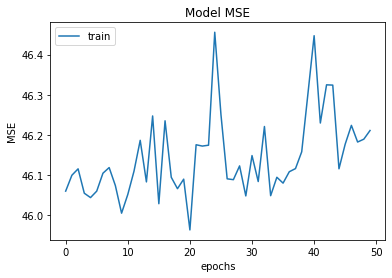

In [50]:
plt.plot(mse_total)
#plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### From Part A - Mean of MSE and Std. Dev.

The mean MSE value is 50.59490996401415 and standard deviation for MSE is 1.0276902495212634

In [48]:
#Calculating mean and standard deviation of MSE - Part B
mean = np.mean(mse_total)
std_dev=np.std(mse_total)

print('The mean MSE value is {} and standard deviation for MSE is {}'.format(mean, std_dev))

The mean MSE value is 46.145059421030176 and standard deviation for MSE is 0.10127510875528388
